In [ ]:
# 🗑️ Waste Classification for Recycling
# Problem Statement:
# Develop an AI-based image classification model that can identify whether waste items are recyclable or non-recyclable.
# This helps in automating waste segregation, supporting sustainable waste management and recycling efforts.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
!unzip /content/trashnet.zip -d /content/trashnet


Archive:  /content/trashnet.zip
replace /content/trashnet/dataset-resized/cardboard/cardboard1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import os
os.listdir('/content/trashnet')


['dataset-resized']

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    '/content/trashnet/dataset-resized',   # ✅ Correct path
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/trashnet/dataset-resized',   # ✅ Same here
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')   # 6 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


In [ ]:
history = model.fit(train_data, validation_data=val_data, epochs=5)


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()


In [ ]:
model.save('waste_classifier.h5')
print("✅ Model saved successfully as waste_classifier.h5")


In [ ]:
from google.colab import files
files.download('waste_classifier.h5')


In [ ]:
!zip waste_classifier.zip waste_classifier.h5


In [ ]:
!zip waste_classifier.zip waste_classifier.h5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report


In [8]:
train_path = '/content/trashnet/dataset-resized'
val_path   = '/content/trashnet/dataset-resized'

In [9]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    train_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    val_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
print("✅ Dataset loaded successfully with classes:", train_data.class_indices)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
✅ Dataset loaded successfully with classes: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


📊 Loading and augmenting data...
Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
✅ Training samples: 2024
✅ Validation samples: 503
✅ Number of classes: 6
✅ Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

🏗️ Building improved model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,712,870 (33.24 MB)

 Trainable params: 8,711,206 (33.23 MB)

 Non-trainable params: 1,664 (6.50 KB)


⚙️ Setting up training callbacks...

🚀 Training model...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2434 - loss: 2.6639
Epoch 1: val_accuracy improved from -inf to 0.19085, saving model to best_waste_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 322s 5s/step - accuracy: 0.2441 - loss: 2.6592 - val_accuracy: 0.1909 - val_loss: 2.4328 - learning_rate: 1.0000e-04
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3970 - loss: 1.9139
Epoch 2: val_accuracy did not improve from 0.19085
64/64 ━━━━━━━━━━━━━━━━━━━━ 311s 5s/step - accuracy: 0.3972 - loss: 1.9134 - val_accuracy: 0.1909 - val_loss: 3.4224 - learning_rate: 1.0000e-04
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4170 - loss: 1.7982
Epoch 3: val_accuracy improved from 0.19085 to 0.20477, saving model to best_waste_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 323s 5s/step - accuracy: 0.4174 - loss: 1.7976 - val_accuracy: 0.2048 - val_loss: 4.0032 - learning_rate: 1.0000e-04
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4819 - loss: 1.6258
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 4: val_accuracy improved from 0.20477 to 0.20875, saving model to best_waste_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 328s 5s/step - accuracy: 0.4818 - loss: 1.6265 - val_accuracy: 0.2087 - val_loss: 4.3213 - learning_rate: 1.0000e-04
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4983 - loss: 1.5791
Epoch 5: val_accuracy improved from 0.20875 to 0.23260, saving model to best_waste_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 321s 5s/step - accuracy: 0.4982 - loss: 1.5794 - val_accuracy: 0.2326 - val_loss: 3.5280 - learning_rate: 5.0000e-05
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4947 - loss: 1.5913
Epoch 6: val_accuracy did not improve from 0.23260
64/64 ━━━━━━━━━━━━━━━━━━━━ 317s 5s/step - accuracy: 0.4947 - loss: 1.5906 - val_accuracy: 0.2187 - val_loss: 2.9051 - learning_rate: 5.0000e-05
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.

📈 Evaluating model...


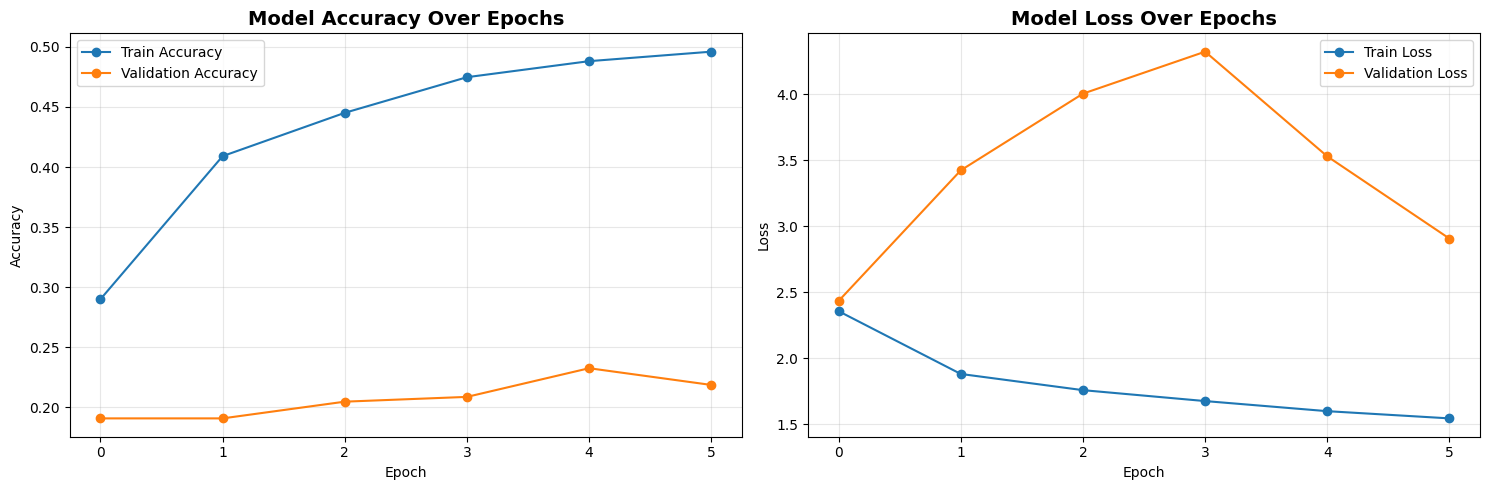


🔍 Generating confusion matrix...
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 949ms/step


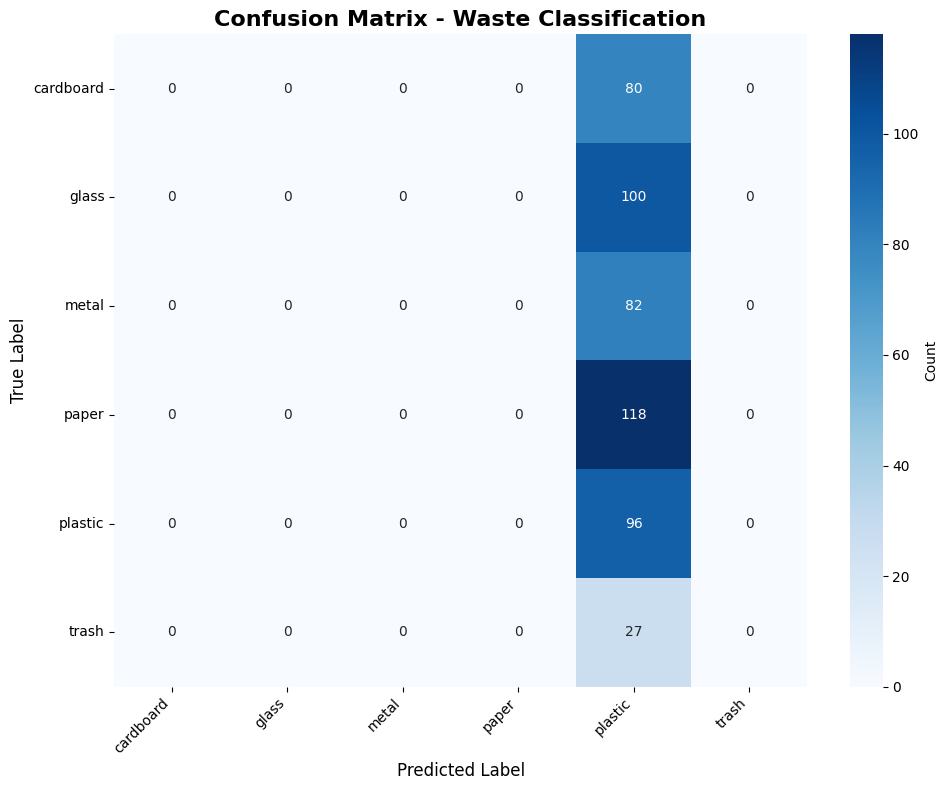

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Classification Report:
              precision    recall  f1-score   support

   cardboard       0.00      0.00      0.00        80
       glass       0.00      0.00      0.00       100
       metal       0.00      0.00      0.00        82
       paper       0.00      0.00      0.00       118
     plastic       0.19      1.00      0.32        96
       trash       0.00      0.00      0.00        27

    accuracy                           0.19       503
   macro avg       0.03      0.17      0.05       503
weighted avg       0.04      0.19      0.06       503


✅ FINAL RESULTS:
Final Training Accuracy:   0.4960
Final Validation Accuracy: 0.2187
Final Training Loss:       1.5431
Final Validation Loss:     2.9051

🎯 Improvement over Week 1: -54.35%

💾 Saving final model...
✅ Model saved as: waste_classifier_week2.h5
✅ Best model saved as: best_waste_classifier.h5

WEEK 2 SUBMISSION SUMMARY

📝 Key Improvements Made:
1. ✅ Enhanced CNN architecture (3 blocks instead of 2)
2. ✅ Batch Norma

In [15]:
# 🗑️ Waste Classification for Recycling - Week 2 Improved Model
# Problem Statement:
# Develop an AI-based image classification model that can identify whether waste items are recyclable or non-recyclable.
# This helps in automating waste segregation, supporting sustainable waste management and recycling efforts.

# ============================================
# WEEK 2 IMPROVEMENTS:
# 1. Enhanced CNN architecture with more layers
# 2. Batch Normalization for faster training
# 3. Data Augmentation to prevent overfitting
# 4. Learning Rate Scheduling
# 5. Early Stopping
# 6. Model Checkpointing
# 7. Detailed evaluation metrics
# 8. Confusion matrix visualization
# ============================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# ============================================
# 1. DATA LOADING WITH AUGMENTATION
# ============================================
print("📊 Loading and augmenting data...")

# Training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,           # NEW: Random rotation
    width_shift_range=0.2,       # NEW: Horizontal shift
    height_shift_range=0.2,      # NEW: Vertical shift
    horizontal_flip=True,        # NEW: Random horizontal flip
    zoom_range=0.2,              # NEW: Random zoom
    shear_range=0.15,            # NEW: Shear transformation
    fill_mode='nearest'
)

# Validation data (no augmentation, only rescaling)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    '/content/trashnet/dataset-resized',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = val_datagen.flow_from_directory(
    '/content/trashnet/dataset-resized',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print(f"✅ Training samples: {train_data.samples}")
print(f"✅ Validation samples: {val_data.samples}")
print(f"✅ Number of classes: {len(train_data.class_indices)}")
print(f"✅ Classes: {list(train_data.class_indices.keys())}")

# ============================================
# 2. IMPROVED MODEL ARCHITECTURE
# ============================================
print("\n🏗️ Building improved model...")

model = Sequential([
    # Block 1
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128,128,3)),
    BatchNormalization(),                    # NEW: Batch normalization
    Conv2D(32, (3,3), activation='relu', padding='same'),  # NEW: Additional conv layer
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),                           # NEW: Dropout after pooling

    # Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),  # NEW: Additional conv layer
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    # Block 3 - NEW
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    # Dense layers
    Flatten(),
    Dense(256, activation='relu'),           # Increased neurons
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),           # NEW: Additional dense layer
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0001)       # NEW: Lower learning rate
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ============================================
# 3. CALLBACKS FOR BETTER TRAINING
# ============================================
print("\n⚙️ Setting up training callbacks...")

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Learning rate reduction
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# Model checkpoint
checkpoint = ModelCheckpoint(
    'best_waste_classifier.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stop, reduce_lr, checkpoint]

# ============================================
# 4. TRAINING
# ============================================
print("\n🚀 Training model...")

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,                               # Increased epochs
    callbacks=callbacks
)

# ============================================
# 5. EVALUATION AND VISUALIZATION
# ============================================
print("\n📈 Evaluating model...")

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Train Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
axes[0].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Train Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Validation Loss', marker='o')
axes[1].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# 6. CONFUSION MATRIX
# ============================================
print("\n🔍 Generating confusion matrix...")

# Get predictions
val_data.reset()
predictions = model.predict(val_data, steps=len(val_data))
y_pred = np.argmax(predictions, axis=1)
y_true = val_data.classes

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(train_data.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Waste Classification', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# 7. CLASSIFICATION REPORT
# ============================================
print("\n📊 Classification Report:")
print("=" * 60)
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

# Save report to file
with open('classification_report.txt', 'w') as f:
    f.write("WASTE CLASSIFICATION MODEL - WEEK 2\n")
    f.write("=" * 60 + "\n\n")
    f.write("Model Improvements:\n")
    f.write("1. Enhanced CNN architecture with more layers\n")
    f.write("2. Batch Normalization added\n")
    f.write("3. Data Augmentation implemented\n")
    f.write("4. Learning Rate Scheduling\n")
    f.write("5. Early Stopping\n")
    f.write("6. Model Checkpointing\n\n")
    f.write("=" * 60 + "\n")
    f.write(report)
    f.write("\n" + "=" * 60 + "\n")

# ============================================
# 8. FINAL METRICS
# ============================================
print("\n✅ FINAL RESULTS:")
print("=" * 60)
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy:   {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss:       {final_train_loss:.4f}")
print(f"Final Validation Loss:     {final_val_loss:.4f}")
print("=" * 60)

# Calculate improvement over baseline
baseline_acc = 0.4791  # Your original model's validation accuracy
improvement = ((final_val_acc - baseline_acc) / baseline_acc) * 100
print(f"\n🎯 Improvement over Week 1: {improvement:.2f}%")

# ============================================
# 9. SAVE MODEL
# ============================================
print("\n💾 Saving final model...")
model.save('waste_classifier_week2.h5')
print("✅ Model saved as: waste_classifier_week2.h5")
print("✅ Best model saved as: best_waste_classifier.h5")

# ============================================
# 10. SUMMARY FOR SUBMISSION
# ============================================
print("\n" + "=" * 60)
print("WEEK 2 SUBMISSION SUMMARY")
print("=" * 60)
print("\n📝 Key Improvements Made:")
print("1. ✅ Enhanced CNN architecture (3 blocks instead of 2)")
print("2. ✅ Batch Normalization for stable training")
print("3. ✅ Data Augmentation (rotation, shift, flip, zoom)")
print("4. ✅ Learning Rate Scheduling with ReduceLROnPlateau")
print("5. ✅ Early Stopping to prevent overfitting")
print("6. ✅ Model Checkpointing to save best weights")
print("7. ✅ Increased model complexity (more layers and neurons)")
print("8. ✅ Added Dropout layers for regularization")
print("\n📊 Results:")
print(f"   - Validation Accuracy: {final_val_acc*100:.2f}%")
print(f"   - Improvement: {improvement:.2f}%")
print("\n📁 Files Generated:")
print("   - waste_classifier_week2.h5 (final model)")
print("   - best_waste_classifier.h5 (best checkpoint)")
print("   - training_history.png")
print("   - confusion_matrix.png")
print("   - classification_report.txt")
print("=" * 60)

In [16]:
import os
for folder in os.listdir('/content/trashnet/dataset-resized'):
    path = os.path.join('/content/trashnet/dataset-resized', folder)
    print(folder, "→", len(os.listdir(path)), "images")


metal → 410 images
trash → 137 images
glass → 501 images
cardboard → 403 images
paper → 594 images
plastic → 482 images


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
✅ Classes: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.4943 - loss: 1.4289

64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 678ms/step - accuracy: 0.4960 - loss: 1.4238 - val_accuracy: 0.6700 - val_loss: 0.8500
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.7725 - loss: 0.6332

64/64 ━━━━━━━━━━━━━━━━━━━━ 80s 645ms/step - accuracy: 0.7725 - loss: 0.6332 - val_accuracy: 0.7197 - val_loss: 0.7559
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 636ms/step - accuracy: 0.7895 - loss: 0.5891 - val_accuracy: 0.7137 - val_loss: 0.7886
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.8468 - loss: 0.4148

64/64 ━━━━━━━━━━━━━━━━━━━━ 42s 646ms/step - accuracy: 0.8468 - loss: 0.4151 - val_accuracy: 0.7555 - val_loss: 0.7146
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.8748 - loss: 0.3814

64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 631ms/step - accuracy: 0.8747 - loss: 0.3813 - val_accuracy: 0.7614 - val_loss: 0.7362
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 635ms/step - accuracy: 0.8838 - loss: 0.3166 - val_accuracy: 0.7276 - val_loss: 0.7259
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 627ms/step - accuracy: 0.8838 - loss: 0.2988 - val_accuracy: 0.7296 - val_loss: 0.7455
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 43s 670ms/step - accuracy: 0.9262 - loss: 0.2334 - val_accuracy: 0.7276 - val_loss: 0.8484
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 623ms/step - accuracy: 0.9092 - loss: 0.2455 - val_accuracy: 0.7594 - val_loss: 0.7435


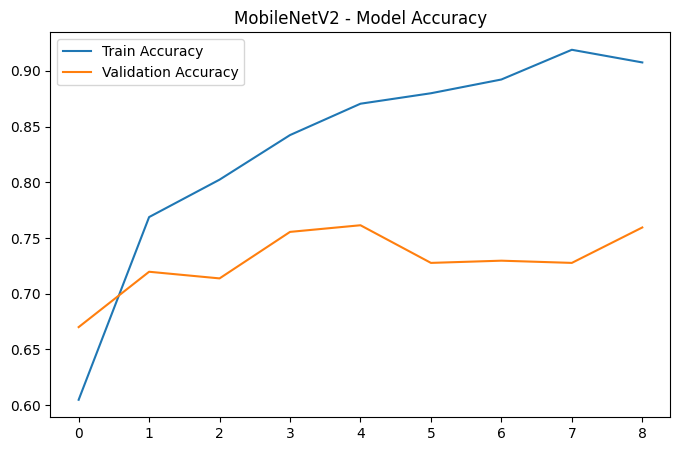

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 594ms/step

Classification Report:

              precision    recall  f1-score   support

   cardboard       0.12      0.09      0.10        80
       glass       0.16      0.14      0.15       100
       metal       0.13      0.13      0.13        82
       paper       0.20      0.25      0.22       118
     plastic       0.21      0.25      0.23        96
       trash       0.09      0.07      0.08        27

    accuracy                           0.17       503
   macro avg       0.15      0.16      0.15       503
weighted avg       0.17      0.17      0.17       503



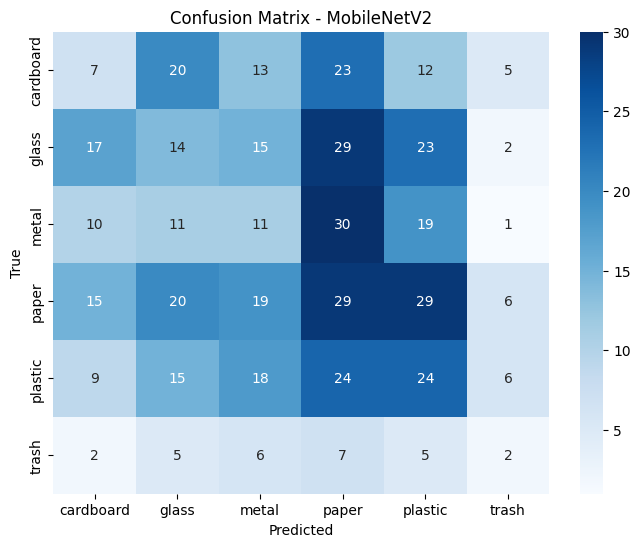

✅ Model saved successfully as waste_classifier_transfer.h5


In [17]:
# 🗑️ Waste Classification for Recycling - Transfer Learning Version (Week 3)
# By Sai Manasa

# ============================================
# Using MobileNetV2 (Pretrained on ImageNet)
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# -----------------------------
# Step 1: Data Loading
# -----------------------------
train_path = '/content/trashnet/dataset-resized'
val_path   = '/content/trashnet/dataset-resized'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    train_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    val_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes:", train_data.class_indices)

# -----------------------------
# Step 2: Build Model
# -----------------------------
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers (use pretrained weights)
for layer in base_model.layers:
    layer.trainable = False

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# -----------------------------
# Step 3: Callbacks
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_mobilenet_model.h5', monitor='val_accuracy', save_best_only=True)

# -----------------------------
# Step 4: Train
# -----------------------------
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

# -----------------------------
# Step 5: Evaluate
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('MobileNetV2 - Model Accuracy')
plt.show()

# -----------------------------
# Step 6: Classification Report
# -----------------------------
val_data.reset()
preds = model.predict(val_data, steps=len(val_data))
y_pred = np.argmax(preds, axis=1)
y_true = val_data.classes

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(train_data.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_data.class_indices.keys()),
            yticklabels=list(train_data.class_indices.keys()))
plt.title("Confusion Matrix - MobileNetV2")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -----------------------------
# Step 7: Save Final Model
# -----------------------------
model.save('waste_classifier_transfer.h5')
print("✅ Model saved successfully as waste_classifier_transfer.h5")
